In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


covidtotals = pd.read_csv("data/covidtotalswithmissings.csv")
totvars = ['location','total_cases','total_deaths','total_cases_pm',
  'total_deaths_pm']

demovars = ['population','pop_density','median_age','gdp_per_capita',
  'hosp_beds']

In [3]:
covidtotals[demovars].isnull().sum(axis=0)

population         0
pop_density       12
median_age        24
gdp_per_capita    28
hosp_beds         46
dtype: int64

In [4]:
demovarsmisscnt = covidtotals[demovars].isnull().sum(axis=1)

In [5]:
demovarsmisscnt.value_counts()

0    156
1     24
2     12
3     10
4      8
dtype: int64

In [7]:
covidtotals.loc[demovarsmisscnt>=3, ['location'] + demovars].head(5).T

,3,5,24,28,64
location,Andorra,Anguilla,Bonaire Sint Eustatius and Saba,British Virgin Islands,Faeroe Islands
population,77265.0,15002.0,26221.0,30237.0,48865.0
pop_density,163.755,NaN,NaN,207.973,35.308
median_age,NaN,NaN,NaN,NaN,NaN
gdp_per_capita,NaN,NaN,NaN,NaN,NaN
hosp_beds,NaN,NaN,NaN,NaN,NaN


In [8]:
type(demovarsmisscnt)

pandas.core.series.Series

In [9]:
covidtotals[totvars].isnull().sum(axis=0)

location           0
total_cases        0
total_deaths       0
total_cases_pm     1
total_deaths_pm    1
dtype: int64

In [10]:
totvarsmisscnt = covidtotals[totvars].isnull().sum(axis=1)

In [11]:
totvarsmisscnt.value_counts()

0    209
2      1
dtype: int64

In [12]:
covidtotals.loc[totvarsmisscnt>0].T

,87
iso_code,HKG
lastdate,2020-05-26
location,Hong Kong
total_cases,0
total_deaths,0
total_cases_pm,NaN
total_deaths_pm,NaN
population,7496988.0
pop_density,7039.714
median_age,44.8


In [13]:
covidtotals.total_cases_pm.fillna(covidtotals.total_cases/
  (covidtotals.population/1000000), inplace=True)

In [14]:
covidtotals.total_deaths_pm.fillna(covidtotals.total_deaths/
  (covidtotals.population/1000000), inplace=True)

In [15]:
covidtotals[totvars].isnull().sum(axis=0)

location           0
total_cases        0
total_deaths       0
total_cases_pm     0
total_deaths_pm    0
dtype: int64

In [16]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scistat
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)
totvars = ['location','total_cases','total_deaths','total_cases_pm',
  'total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita',
  'hosp_beds']

In [4]:
covidtotalsonly = covidtotals.loc[:, totvars]

In [5]:
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.100000e+02,210.000000,210.000000,210.000000
mean,2.921614e+04,1770.714286,1355.357943,55.659129
std,1.363978e+05,8705.565857,2625.277497,144.785816
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.757500e+02,4.000000,92.541500,0.884750
50%,1.242500e+03,25.500000,280.928500,6.154000
75%,1.011700e+04,241.250000,1801.394750,31.777250
max,1.790191e+06,104383.000000,19771.348000,1237.551000


In [6]:
covidtotalsonly.quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.0000,0.0000
0.1,22.9,0.0,17.9986,0.0000
0.2,105.2,2.0,56.2910,0.3752
0.3,302.0,6.7,115.4341,1.7183
0.4,762.0,12.0,213.9734,3.9566
0.5,1242.5,25.5,280.9285,6.1540
0.6,2514.6,54.6,543.9562,12.2452
0.7,6959.8,137.2,1071.2442,25.9459
0.8,16847.2,323.2,2206.2982,49.9658
0.9,46513.1,1616.9,3765.1363,138.9045


In [7]:
covidtotalsonly.skew()

C:\Users\mikol\AppData\Local\Temp/ipykernel_28576/826569919.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  covidtotalsonly.skew()


total_cases        10.804275
total_deaths        8.929816
total_cases_pm      4.396091
total_deaths_pm     4.674417
dtype: float64

In [8]:
covidtotalsonly.kurtosis()

C:\Users\mikol\AppData\Local\Temp/ipykernel_28576/2848359957.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  covidtotalsonly.kurtosis()


total_cases        134.979577
total_deaths        95.737841
total_cases_pm      25.242790
total_deaths_pm     27.238232
dtype: float64

In [9]:
def testnorm(var, df):
  stat, p = scistat.shapiro(df[var])
  return p

In [10]:
testnorm("total_cases", covidtotalsonly)

3.753789128593843e-29

In [11]:
testnorm("total_deaths", covidtotalsonly)

4.3427896631016077e-29

In [12]:
testnorm("total_cases_pm", covidtotalsonly)

1.3972683006509067e-23

In [13]:
testnorm("total_deaths_pm", covidtotalsonly)

1.361060423265974e-25

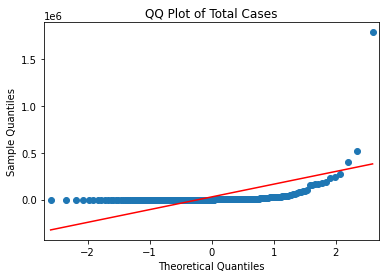

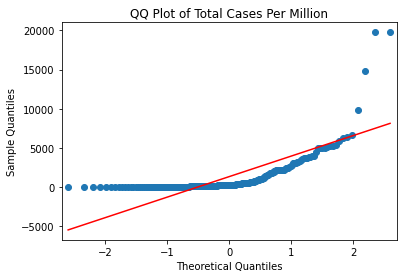

In [14]:
sm.qqplot(covidtotalsonly[['total_cases']]. \
  sort_values(['total_cases']), line='s')
plt.title("QQ Plot of Total Cases")
sm.qqplot(covidtotals[['total_cases_pm']]. \
  sort_values(['total_cases_pm']), line='s')
plt.title("QQ Plot of Total Cases Per Million")
plt.show()

In [15]:
thirdq, firstq = covidtotalsonly.total_cases.quantile(0.75), covidtotalsonly.total_cases.quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
outlierhigh, outlierlow = interquartilerange+thirdq, firstq-interquartilerange
print(outlierlow, outlierhigh, sep=" <--> ")

-14736.125 <--> 25028.875


In [16]:
def getoutliers():
  dfout = pd.DataFrame(columns=covidtotals.columns, data=None)
  for col in covidtotalsonly.columns[1:]:
    thirdq, firstq = covidtotalsonly[col].quantile(0.75),\
      covidtotalsonly[col].quantile(0.25)
    interquartilerange = 1.5*(thirdq-firstq)
    outlierhigh, outlierlow =           interquartilerange+thirdq,\
      firstq-interquartilerange
    df = covidtotals.loc[(covidtotals[col]>outlierhigh) | \
      (covidtotals[col]<outlierlow)]
    df = df.assign(varname = col,            threshlow = outlierlow,\
       threshhigh = outlierhigh)
    dfout = pd.concat([dfout, df])
  return dfout

In [17]:
outliers = getoutliers()
outliers.varname.value_counts()

total_deaths       36
total_cases        33
total_deaths_pm    28
total_cases_pm     17
Name: varname, dtype: int64

In [18]:
outliers.to_excel("views/outlierscases.xlsx")

In [19]:
outliers.loc[outliers.varname=="total_cases_pm",\
  ['location','total_cases_pm','pop_density','gdp_per_capita']].\
  sort_values(['total_cases_pm'], ascending=False)

,location,total_cases_pm,pop_density,gdp_per_capita
SMR,San Marino,19771.348,556.667,56861.470
QAT,Qatar,19753.146,227.322,116935.600
VAT,Vatican,14833.127,NaN,NaN
AND,Andorra,9888.048,163.755,NaN
BHR,Bahrain,6698.468,1935.907,43290.705
LUX,Luxembourg,6418.776,231.447,94277.965
KWT,Kuwait,6332.420,232.128,65530.537
SGP,Singapore,5962.727,7915.731,85535.383
USA,United States,5408.389,35.608,54225.446
ISL,Iceland,5292.308,3.404,46482.958


In [20]:
covidtotals[['pop_density','gdp_per_capita']].quantile([0.25,0.5,0.75])

,pop_density,gdp_per_capita
0.25,37.416,4485.32900
0.50,87.250,13183.08150
0.75,214.122,28556.52725


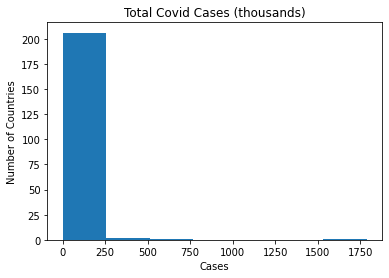

In [21]:
plt.hist(covidtotalsonly['total_cases']/1000, bins=7)
plt.title("Total Covid Cases (thousands)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()

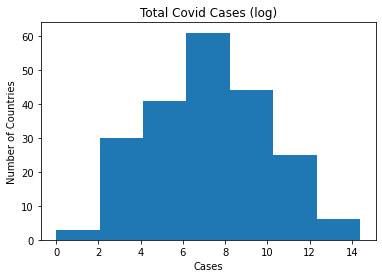

In [22]:
covidlogs = covidtotalsonly.copy()
for col in covidtotalsonly.columns[1:]:
  covidlogs[col] = np.log1p(covidlogs[col])
plt.hist(covidlogs['total_cases'], bins=7)
plt.title("Total Covid Cases (log)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()

In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)
totvars = ['location','total_cases','total_deaths','total_cases_pm',
  'total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita',
  'hosp_beds']

In [25]:
covidtotals.corr(method="pearson")

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
total_cases,1.000000,0.932079,0.182246,0.247464,0.270030,-0.028737,0.162698,0.186835,0.027601
total_deaths,0.932079,1.000000,0.179812,0.394811,0.212619,-0.031645,0.205128,0.198729,0.019990
total_cases_pm,0.182246,0.179812,1.000000,0.586468,-0.056009,0.110043,0.313836,0.651200,0.081449
total_deaths_pm,0.247464,0.394811,0.586468,1.000000,-0.013902,0.030281,0.389595,0.383672,0.120488
population,0.270030,0.212619,-0.056009,-0.013902,1.000000,-0.023084,0.024395,-0.059555,-0.038329
pop_density,-0.028737,-0.031645,0.110043,0.030281,-0.023084,1.000000,0.178878,0.315199,0.314973
median_age,0.162698,0.205128,0.313836,0.389595,0.024395,0.178878,1.000000,0.648905,0.662222
gdp_per_capita,0.186835,0.198729,0.651200,0.383672,-0.059555,0.315199,0.648905,1.000000,0.296995
hosp_beds,0.027601,0.019990,0.081449,0.120488,-0.038329,0.314973,0.662222,0.296995,1.000000


In [27]:
covidtotalsonly = covidtotals.loc[:, totvars]
covidtotalsonly['total_cases_q'] = pd.\
  qcut(covidtotalsonly['total_cases'],
  labels=['very low','low','medium',
  'high','very high'], q=5, precision=0)

In [28]:
covidtotalsonly['total_deaths_q'] = pd.\
  qcut(covidtotalsonly['total_deaths'],
  labels=['very low','low','medium',
  'high','very high'], q=5, precision=0)

In [29]:
pd.crosstab(covidtotalsonly.total_cases_q,
  covidtotalsonly.total_deaths_q)

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,34,7,1,0,0
low,12,19,10,1,0
medium,1,13,15,13,0
high,0,0,12,24,6
very high,0,0,2,4,36


In [30]:
covidtotals.loc[(covidtotalsonly.total_cases_q=="very high") & (covidtotalsonly.total_deaths_q=="medium")].T

iso_code,QAT,SGP
lastdate,2020-06-01,2020-06-01
location,Qatar,Singapore
total_cases,56910,34884
total_deaths,38,23
total_cases_pm,19753.146,5962.727
total_deaths_pm,13.19,3.931
population,2881060.0,5850343.0
pop_density,227.322,7915.731
median_age,31.9,42.4
gdp_per_capita,116935.6,85535.383


In [31]:
covidtotals.loc[(covidtotalsonly.total_cases_q=="low") & (covidtotalsonly.total_deaths_q=="high")].T

iso_code,YEM
lastdate,2020-06-01
location,Yemen
total_cases,323
total_deaths,80
total_cases_pm,10.829
total_deaths_pm,2.682
population,29825968.0
pop_density,53.508
median_age,20.3
gdp_per_capita,1479.147


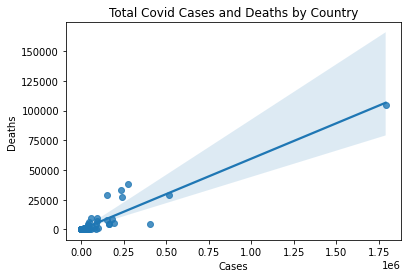

In [32]:
ax = sns.regplot(x="total_cases", y="total_deaths", data=covidtotals)
ax.set(xlabel="Cases", ylabel="Deaths", title="Total Covid Cases and Deaths by Country")
plt.show()

In [33]:
covidtotals.loc[(covidtotals.total_cases<300000) & (covidtotals.total_deaths>20000)].T

iso_code,FRA,ITA,ESP,GBR
lastdate,2020-06-01,2020-06-01,2020-05-31,2020-06-01
location,France,Italy,Spain,United Kingdom
total_cases,151753,233019,239429,274762
total_deaths,28802,33415,27127,38489
total_cases_pm,2324.879,3853.985,5120.952,4047.403
total_deaths_pm,441.251,552.663,580.197,566.965
population,65273512.0,60461828.0,46754783.0,67886004.0
pop_density,122.578,205.859,93.105,272.898
median_age,42.0,47.9,45.5,40.8
gdp_per_capita,38605.671,35220.084,34272.36,39753.244


In [34]:
covidtotals.loc[(covidtotals.total_cases>300000) & (covidtotals.total_deaths<10000)].T

iso_code,RUS
lastdate,2020-06-01
location,Russia
total_cases,405843
total_deaths,4693
total_cases_pm,2780.995
total_deaths_pm,32.158
population,145934460.0
pop_density,8.823
median_age,39.6
gdp_per_capita,24765.954


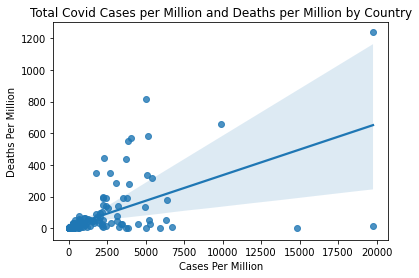

In [35]:
ax = sns.regplot(x="total_cases_pm", y="total_deaths_pm", data=covidtotals)
ax.set(xlabel="Cases Per Million", ylabel="Deaths Per Million", title="Total Covid Cases per Million and Deaths per Million by Country")
plt.show()

In [36]:
covidtotals.loc[(covidtotals.total_cases_pm<7500) \
  & (covidtotals.total_deaths_pm>250),\
  ['location','total_cases_pm','total_deaths_pm']]

,location,total_cases_pm,total_deaths_pm
iso_code,,,
BEL,Belgium,5037.354,816.852
FRA,France,2324.879,441.251
IRL,Ireland,5060.962,334.562
IMN,Isle of Man,3951.454,282.247
ITA,Italy,3853.985,552.663
JEY,Jersey,3047.302,286.921
NLD,Netherlands,2710.379,347.595
SXM,Sint Maarten (Dutch part),1795.625,349.797
ESP,Spain,5120.952,580.197


In [37]:
covidtotals.loc[(covidtotals.total_cases_pm>5000) \
  & (covidtotals.total_deaths_pm<=50), \
  ['location','total_cases_pm','total_deaths_pm']]

,location,total_cases_pm,total_deaths_pm
iso_code,,,
BHR,Bahrain,6698.468,11.166
GIB,Gibraltar,5016.176,0.000
ISL,Iceland,5292.308,29.304
KWT,Kuwait,6332.420,49.642
QAT,Qatar,19753.146,13.190
SGP,Singapore,5962.727,3.931
VAT,Vatican,14833.127,0.000


In [39]:
import pandas as pd
import numpy as np
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)

In [41]:
nls97[['wageincome','highestgradecompleted','highestdegree']].head(3).T

personid,100061,100139,100284
wageincome,12500.0,120000.0,58000.0
highestgradecompleted,13.0,12.0,7.0
highestdegree,2. High School,2. High School,0. None


In [42]:
nls97.loc[:, "weeksworked12":"weeksworked17"].head(3).T

personid,100061,100139,100284
weeksworked12,40.0,52.0,0.0
weeksworked13,52.0,52.0,NaN
weeksworked14,52.0,52.0,11.0
weeksworked15,52.0,52.0,52.0
weeksworked16,48.0,53.0,47.0
weeksworked17,48.0,52.0,0.0


In [43]:
nls97.loc[:, "colenroct09":"colenrfeb14"].head(3).T

personid,100061,100139,100284
colenroct09,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb10,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct10,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb11,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct11,3. 4-year college,1. Not enrolled,1. Not enrolled
colenrfeb12,3. 4-year college,1. Not enrolled,1. Not enrolled
colenroct12,3. 4-year college,1. Not enrolled,1. Not enrolled
colenrfeb13,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct13,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb14,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [44]:
nls97.loc[(nls97.weeksworked16==0) & nls97.wageincome>0, ['weeksworked16','wageincome']]

,weeksworked16,wageincome
personid,,
102625,0.0,1200.0
109403,0.0,5000.0
118704,0.0,25000.0
130701,0.0,12000.0
131151,0.0,65000.0
...,...,...
957344,0.0,90000.0
966697,0.0,65000.0
969334,0.0,5000.0


In [45]:
nls97.filter(like="colenr").apply(lambda x: x.str[0:1]=='3').head(2).T

personid,100061,100139
colenrfeb97,False,False
colenroct97,False,False
colenrfeb98,False,False
colenroct98,False,False
colenrfeb99,False,False
colenroct99,False,False
colenrfeb00,False,False
colenroct00,False,False
colenrfeb01,False,False
colenroct01,False,False


In [46]:
nls97.filter(like="colenr").apply(lambda x: x.str[0:1]=='3').any(axis=1).head(2)

personid
100061     True
100139    False
dtype: bool

In [48]:
nobach = nls97.loc[nls97.filter(like="colenr").apply(lambda x: x.str[0:1]=='4').any(axis=1) & ~nls97.filter(like="colenr").apply(lambda x: x.str[0:1]=='3').any(axis=1), "colenrfeb97":"colenroct17"]

In [50]:
len(nobach)

22

In [51]:
nobach.head(3).T

personid,153051,154535,184721
colenrfeb97,NaN,NaN,NaN
colenroct97,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb99,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct99,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb00,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct00,2. 2-year college,1. Not enrolled,1. Not enrolled
colenrfeb01,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct01,2. 2-year college,1. Not enrolled,1. Not enrolled


In [52]:
nls97.highestdegree.value_counts(sort=False)

2. High School     3667
0. None             953
4. Bachelors       1673
3. Associates       737
5. Masters          603
1. GED             1146
7. Professional     120
6. PhD               54
Name: highestdegree, dtype: int64

In [53]:
no4yearenrollment = nls97.loc[nls97.highestdegree.str[0:1].\
  isin(['4','5','6','7']) & ~nls97.filter(like="colenr").\
  apply(lambda x: x.str[0:1]=='3').\
  any(axis=1), "colenrfeb97":"colenroct17"]

In [54]:
len(no4yearenrollment)

39

In [55]:
no4yearenrollment.head(3).T

personid,113486,118749,124616
colenrfeb97,1. Not enrolled,NaN,1. Not enrolled
colenroct97,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb99,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct99,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb00,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct00,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb01,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct01,2. 2-year college,1. Not enrolled,1. Not enrolled


In [57]:
highwages = nls97.loc[nls97.wageincome > nls97.wageincome.mean()+(nls97.wageincome.std()*3),['wageincome']]
highwages

,wageincome
personid,
131858,235884.0
133619,235884.0
151863,235884.0
164058,235884.0
164897,235884.0
...,...
964406,235884.0
966024,235884.0
976141,235884.0


In [58]:
workchanges = nls97.loc[~nls97.loc[:,
  "weeksworked12":"weeksworked16"].mean(axis=1).\
  between(nls97.weeksworked17*0.5,nls97.weeksworked17*2) \
  & ~nls97.weeksworked17.isnull(), 
  "weeksworked12":"weeksworked17"]

In [59]:
len(workchanges)

1160

In [60]:
workchanges.head(7).T

personid,100284,101526,101718,101724,102228,102454,102625
weeksworked12,0.0,0.0,52.0,52.0,52.0,52.0,14.0
weeksworked13,NaN,0.0,9.0,52.0,52.0,52.0,3.0
weeksworked14,11.0,0.0,0.0,52.0,17.0,7.0,52.0
weeksworked15,52.0,0.0,32.0,17.0,0.0,0.0,44.0
weeksworked16,47.0,0.0,0.0,0.0,0.0,0.0,0.0
weeksworked17,0.0,45.0,0.0,17.0,0.0,0.0,0.0


In [61]:
ltgrade12 = nls97.loc[nls97.highestgradecompleted<12, ['highestgradecompleted','highestdegree']]

In [62]:
pd.crosstab(ltgrade12.highestgradecompleted, ltgrade12.highestdegree)

highestdegree,0. None,1. GED,2. High School
highestgradecompleted,,,
5.0,0,0,1
6.0,11,5,0
7.0,24,6,1
8.0,113,78,7
9.0,112,169,8
10.0,111,204,13
11.0,120,200,41


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

In [64]:
xvars = ['pop_density','median_age','gdp_per_capita']
covidanalysis = covidtotals.loc[:,['total_cases_pm'] + xvars].dropna()
covidanalysis.describe()

,total_cases_pm,pop_density,median_age,gdp_per_capita
count,175.000000,175.000000,175.000000,175.000000
mean,1134.015709,247.151863,30.537143,19008.385423
std,2101.363772,822.398967,9.117751,19673.386571
min,0.000000,1.980000,15.100000,661.240000
25%,67.448000,36.066000,22.300000,4458.202500
50%,263.413000,82.328000,29.700000,12951.839000
75%,1357.506000,207.960000,38.700000,27467.146000
max,19753.146000,7915.731000,48.200000,116935.600000


In [65]:
def getlm(df):
  Y = df.total_cases_pm
  X = df[['pop_density','median_age','gdp_per_capita']]
  X = sm.add_constant(X)
  return sm.OLS(Y, X).fit()

In [66]:
lm = getlm(covidanalysis)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_cases_pm   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     61.81
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           4.06e-27
Time:                        16:05:02   Log-Likelihood:                -1522.4
No. Observations:                 175   AIC:                             3053.
Df Residuals:                     171   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            944.4731    426.712      2.213      0.028     102.172    1786.774
pop_density       -0.2057      0.142     -1.447      0.150      -0.486       0.075
median_age       -49.4398     16.013     -3.088      0.002     -81.048     -17.832
gdp_per_capita     0.0921      0.008     12.015      0.000       0.077       0.107
==============================================================================
Omnibus:                      105.361   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1182.641
Skew:                           1.967   Prob(JB):                    1.56e-257
Kurtosis:                      15.113   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
influence = lm.get_influence().summary_frame()
influence.loc[influence.cooks_d>0.5, ['cooks_d']]

,cooks_d
iso_code,
HKG,0.780662
QAT,5.080180


In [68]:
covidanalysis.loc[influence.cooks_d>0.5]

,total_cases_pm,pop_density,median_age,gdp_per_capita
iso_code,,,,
HKG,0.000,7039.714,44.8,56054.92
QAT,19753.146,227.322,31.9,116935.60


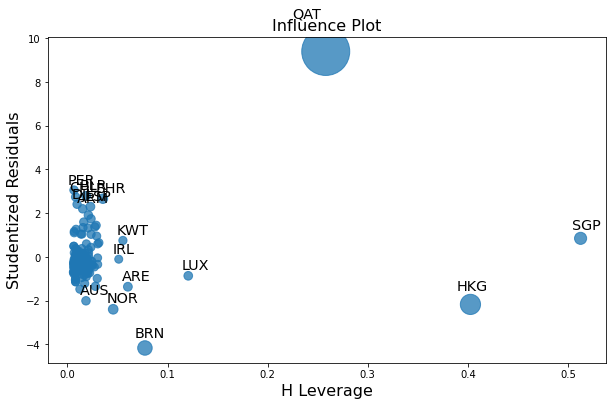

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
sm.graphics.influence_plot(lm, ax = ax, criterion="cooks")
plt.show()

In [70]:
covidanalysisminusoutliers = covidanalysis.loc[influence.cooks_d<0.5]
lm = getlm(covidanalysisminusoutliers)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_cases_pm   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     46.56
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           5.52e-22
Time:                        16:07:21   Log-Likelihood:                -1464.8
No. Observations:                 173   AIC:                             2938.
Df Residuals:                     169   BIC:                             2950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             44.0854    349.924      0.126      0.900    -646.700     734.870
pop_density        0.2423      0.145      1.666      0.098      -0.045       0.529
median_age        -2.5165     13.526     -0.186      0.853     -29.217      24.184
gdp_per_capita     0.0557      0.007      7.875      0.000       0.042       0.070
==============================================================================
Omnibus:                       53.262   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.935
Skew:                           1.347   Prob(JB):                     1.22e-27
Kurtosis:                       6.152   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.  Using cached pyod-0.9.5.tar.gz (113 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)

  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)

You should consider upgrading via the 'C:\Users\mikol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Created wheel for pyod: filename=pyod-0.9.5-py3-none-any.whl size=132699 sha256=456af41b9e81a0876e79587b0be8395c1db7928521c941dde6ba4b96a22063fd
  Stored in directory: c:\users\mikol\appdata\local\pip\cache\wheels\03\ce\6c\14bc136fa7af4c630e34c7de213b06256dbe956a53a2303245
Successfully built pyod
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2


In [2]:
pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\mikol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

In [5]:
standardizer = StandardScaler()
analysisvars = ['location','total_cases_pm','total_deaths_pm',\
  'pop_density','median_age','gdp_per_capita']
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

In [6]:
clf_name = 'KNN'
clf = KNN(contamination=0.1)
clf.fit(covidanalysisstand)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [7]:
y_pred = clf.labels_
y_scores = clf.decision_scores_



In [8]:
pred = pd.DataFrame(zip(y_pred, y_scores), 
  columns=['outlier','scores'], 
  index=covidanalysis.index)

pred.sample(10, random_state=1)

,outlier,scores
iso_code,,
LBY,0,0.367532
NLD,1,1.564052
BTN,0,0.185273
HTI,0,0.433058
EST,0,0.464279
LCA,0,0.431069
PER,0,1.411336
BRB,0,0.769047
MDA,0,0.912486


In [9]:
pred.outlier.value_counts()

0    157
1     18
Name: outlier, dtype: int64

In [10]:
pred.groupby(['outlier'])[['scores']].agg(['min','median','max'])

scores                    
              min    median       max
outlier                              
0        0.081259  0.364803  1.519804
1        1.553681  2.096079  9.483549

In [11]:
covidanalysis.join(pred).loc[pred.outlier==1,\
  ['location','total_cases_pm','total_deaths_pm','scores']].\
  sort_values(['scores'], ascending=False)

,location,total_cases_pm,total_deaths_pm,scores
iso_code,,,,
SGP,Singapore,5962.727,3.931,9.483549
QAT,Qatar,19753.146,13.190,8.001605
HKG,Hong Kong,0.000,0.000,7.771722
BEL,Belgium,5037.354,816.852,3.544827
BHR,Bahrain,6698.468,11.166,2.842906
LUX,Luxembourg,6418.776,175.726,2.442886
ESP,Spain,5120.952,580.197,2.176441
KWT,Kuwait,6332.420,49.642,2.127519
GBR,United Kingdom,4047.403,566.965,2.103458


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

In [13]:
analysisvars = ['location','total_cases_pm','total_deaths_pm',
  'pop_density','median_age','gdp_per_capita']
standardizer = StandardScaler()
covidtotals.isnull().sum()

lastdate            0
location            0
total_cases         0
total_deaths        0
total_cases_pm      0
total_deaths_pm     0
population          0
pop_density        12
median_age         24
gdp_per_capita     28
hosp_beds          46
dtype: int64

In [14]:
covidanalysis = covidtotals.loc[:, analysisvars].dropna()

In [15]:
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

In [16]:
clf=IsolationForest(n_estimators=100, max_samples='auto',
  contamination=.1, max_features=1.0)

In [17]:
clf.fit(covidanalysisstand)

IsolationForest(contamination=0.1)

In [18]:
covidanalysis['anomaly'] = clf.predict(covidanalysisstand)
covidanalysis['scores'] = clf.decision_function(covidanalysisstand)
covidanalysis.anomaly.value_counts()

 1    157
-1     18
Name: anomaly, dtype: int64

In [19]:
inlier, outlier = covidanalysis.loc[covidanalysis.anomaly==1],covidanalysis.loc[covidanalysis.anomaly==-1]

outlier[['location','total_cases_pm','total_deaths_pm',\
  'median_age','gdp_per_capita','scores']].\
  sort_values(['scores']).\
  head(10)

,location,total_cases_pm,total_deaths_pm,median_age,gdp_per_capita,scores
iso_code,,,,,,
QAT,Qatar,19753.146,13.190,31.9,116935.600,-0.235363
SGP,Singapore,5962.727,3.931,42.4,85535.383,-0.210687
HKG,Hong Kong,0.000,0.000,44.8,56054.920,-0.178571
BEL,Belgium,5037.354,816.852,41.8,42658.576,-0.116083
BHR,Bahrain,6698.468,11.166,32.4,43290.705,-0.092446
ESP,Spain,5120.952,580.197,45.5,34272.360,-0.073603
LUX,Luxembourg,6418.776,175.726,39.7,94277.965,-0.072269
ITA,Italy,3853.985,552.663,47.9,35220.084,-0.063899
NLD,Netherlands,2710.379,347.595,43.2,48472.545,-0.049787


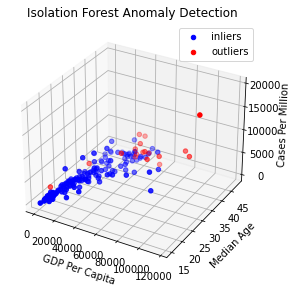

In [20]:
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel("Cases Per Million")
ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Median Age")
ax.scatter3D(inlier.gdp_per_capita, inlier.median_age, inlier.total_cases_pm, label="inliers", c="blue")
ax.scatter3D(outlier.gdp_per_capita, outlier.median_age, outlier.total_cases_pm, label="outliers", c="red")
ax.legend()
plt.tight_layout()
plt.show()